In [1]:
import sys
sys.path.append('/path/to/pyfesom')
import pyfesom as pf
import matplotlib.pylab as plt
from matplotlib.backends.backend_pdf import PdfPages
import numpy as np
from matplotlib import cm
import matplotlib.colors as mcol
import cmocean
import numpy.matlib

cartopy is not avalible, plotting will not work


### Plot Figure 4, panels a) b) c) and d) e) f)

In [2]:
import pickle

In [3]:
with open('../data/data_Fig4.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not have to specify it.
    data = pickle.load(f)

In [4]:
pickle.HIGHEST_PROTOCOL

5

### LR

In [5]:
meshname4plots ='LR'

In [6]:
# get 3D T & S fields 
data_T=data['LR']['zz_temp_pot']
data_S=data['LR']['zz_salt']
xx=data['LR']['xx']
yy=data['LR']['yy']

# initalize T & S sections (lev x lats)
sect_layer=np.zeros((33,180)) 
sect_layer_S=np.zeros((33,180))

# initialize sigma layers in model and PHC, section
sigm_layer=np.zeros((33,180)) 
sigm_layer_PHC=np.zeros((33,180))

# go through T & S for every layer (0 ... 32):
for ilevel in np.arange(np.shape(data['PHC']['clim'].z)[0]):
    # 2D T & S on level
    layer=data_T[ilevel,:,:]
    layer_S=data_S[ilevel,:,:]
    # 2D sigma2 on level
    layersigma=data['LR']['zz_sigma_2'][ilevel,:,:]
    layersigma_PHC=data['PHC']['PHC_sigma2'][ilevel,:,:]
    
    # cut out T & S section
    sect_layer[ilevel,:]=layer[xx==-30.5]
    sect_layer_S[ilevel,:]=layer_S[xx==-30.5]
    # sigma layers, section
    sigm_layer[ilevel,:]=layersigma[xx==-30.5]
    sigm_layer_PHC[ilevel,:]=layersigma_PHC[xx==-30.5] 

#### LR potential temperature, panel f)

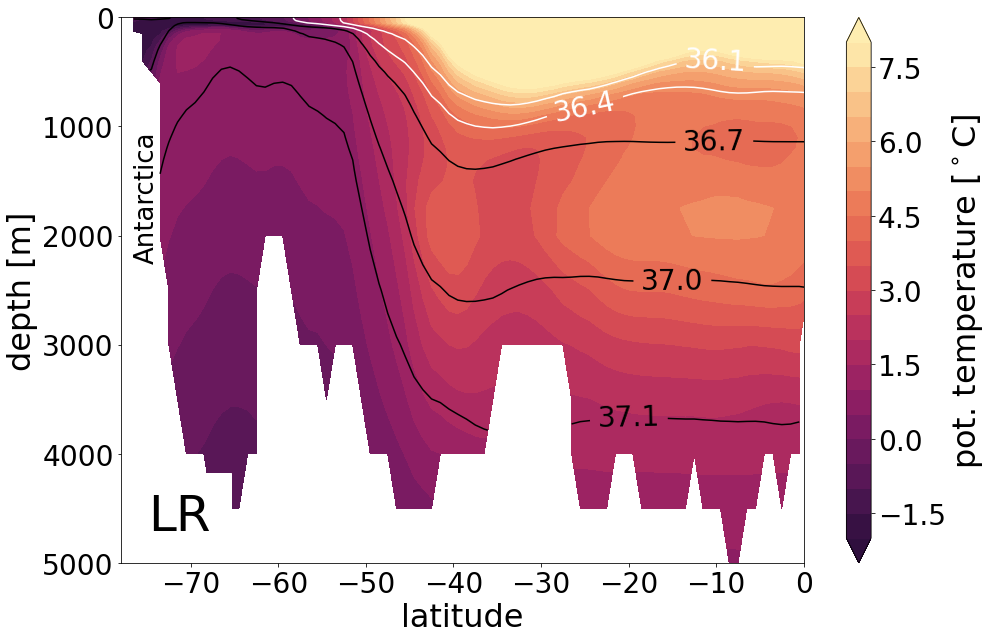

In [7]:
fig=plt.figure(figsize=(14,9))

cmap=cmocean.cm.matter_r

# set sizes
numfontsize=28
texfontsize=32

uptolat=91

YY,CLIMZ=np.meshgrid(yy[:uptolat,0], data['PHC']['clim'].z[0:])
levels = np.arange(-2, 8.+0.5, 0.5) # -5 to 5 degrees
CS1 = plt.contourf(YY, CLIMZ, sect_layer[0:,:uptolat], levels = levels, cmap=cmap, extend='both');

plt.gca().invert_yaxis()

# highlight some contours
CS3 = plt.contour(YY, CLIMZ, sigm_layer[:,:uptolat], levels=np.round(np.array([36.1, 36.4, 36.7, 37.0, 37.1]),1),colors=['w','w','k','k','k']) # 
manual_locations = [(-10, 300), (-25, 800), (-10, 1500), (-15, 2500), (-20, 4000)]
plt.clabel(CS3, inline=1, fontsize=numfontsize, fmt='%1.1f', manual=manual_locations)

plt.text(-76.5,2200,'Antarctica', rotation='90', fontsize=26)
plt.ylabel('depth [m]',fontsize=texfontsize), plt.xlabel('latitude',fontsize=texfontsize)
plt.ylim((5000,0))
plt.xlim((-78,0))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# colorbar
cbar=plt.colorbar(CS1, orientation = 'vertical')
cbar_label='pot. temperature [$^\circ$C]'
cbar.set_label(cbar_label, fontsize=texfontsize)
cbar.ax.tick_params(labelsize=numfontsize) 

# tick sizes
plt.xticks(fontsize=numfontsize, rotation=0)
plt.yticks(fontsize=numfontsize, rotation=0)

# annotation
plt.annotate('LR', xy=(0.04, 0.059), xycoords='axes fraction', backgroundcolor = 'w', color='k', fontsize=50)

plt.tight_layout()

saveFIG=True
if saveFIG==True:
   pp = PdfPages('./Figure4f_LR.pdf')
   pp.savefig(fig,bbox_inches = 'tight')
   pp.close()

#### LR salinity, panel c)

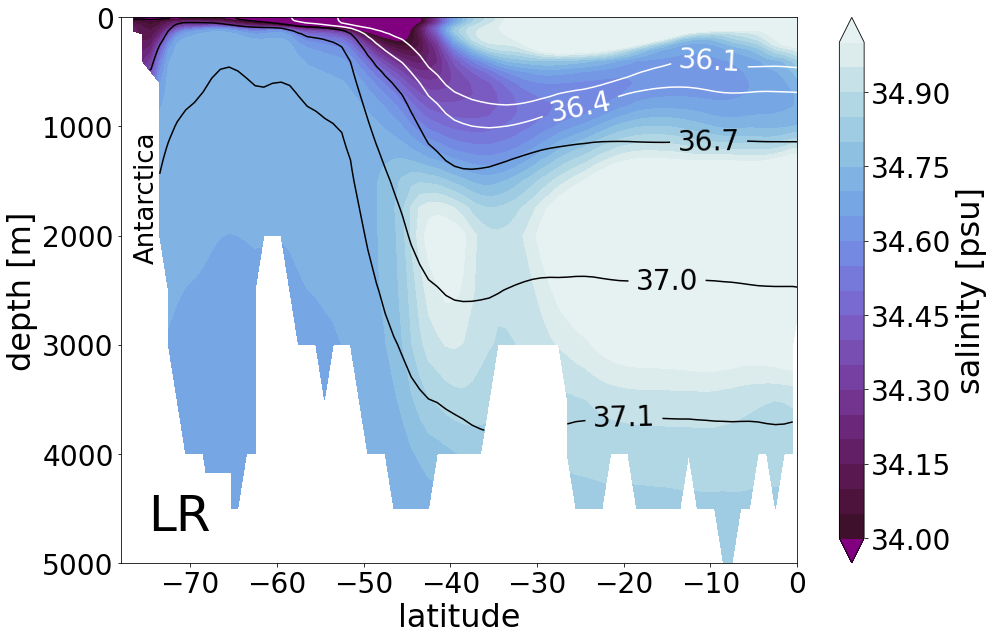

In [8]:
fig=plt.figure(figsize=(14,9))

cmap=cmocean.cm.dense_r
cmap.set_under('purple')

# set sizes
numfontsize=28
texfontsize=32

uptolat=91

levels = np.arange(34, 35.+0.05, 0.05) # -1 to 1 psu
YY,CLIMZ=np.meshgrid(yy[:uptolat,0], data['PHC']['clim'].z[0:])
CS1 = plt.contourf(YY, CLIMZ, sect_layer_S[0:,:uptolat], levels = levels, cmap=cmap, extend='both');

plt.gca().invert_yaxis()

# highlight some contours
CS3 = plt.contour(YY, CLIMZ, sigm_layer[:,:uptolat], levels=np.round(np.array([36.1, 36.4, 36.7, 37.0, 37.1]),1),colors=['w','w','k','k','k']) # 
manual_locations = [(-10, 300), (-25, 800), (-10, 1500), (-15, 2500), (-20, 4000)]
plt.clabel(CS3, inline=1, fontsize=numfontsize, fmt='%1.1f', manual=manual_locations)

plt.text(-76.5,2200,'Antarctica', rotation='90', fontsize=26)
plt.ylabel('depth [m]',fontsize=texfontsize), plt.xlabel('latitude',fontsize=texfontsize)
plt.ylim((5000,0))
plt.xlim((-78,0))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# colorbar
cbar=plt.colorbar(CS1, orientation = 'vertical')
cbar_label='salinity [psu]'
cbar.set_label(cbar_label, fontsize=texfontsize)
cbar.ax.tick_params(labelsize=numfontsize) 

# tick sizes
plt.xticks(fontsize=numfontsize, rotation=0)
plt.yticks(fontsize=numfontsize, rotation=0)

# annotation
plt.annotate('LR', xy=(0.04, 0.059), xycoords='axes fraction', backgroundcolor = 'w', color='k', fontsize=50)

plt.tight_layout()

saveFIG=True
if saveFIG==True:
   pp = PdfPages('./Figure4c_LR.pdf')
   pp.savefig(fig,bbox_inches = 'tight')
   pp.close()

#### LR sea-ice fraction, panel c)

In [9]:
with open('../data/data_Fig4_ice.pickle', 'rb') as f:
    # The protocol version used is detected automatically, so we do not have to specify it.
    dataSIE = pickle.load(f)

In [10]:
xx[:,149].mean()

-30.5

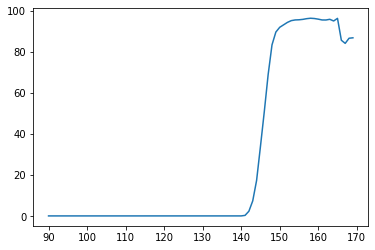

In [11]:
which='LR'
period='sta'
plt.plot(100.*dataSIE[which]['area_'+period][:,149])

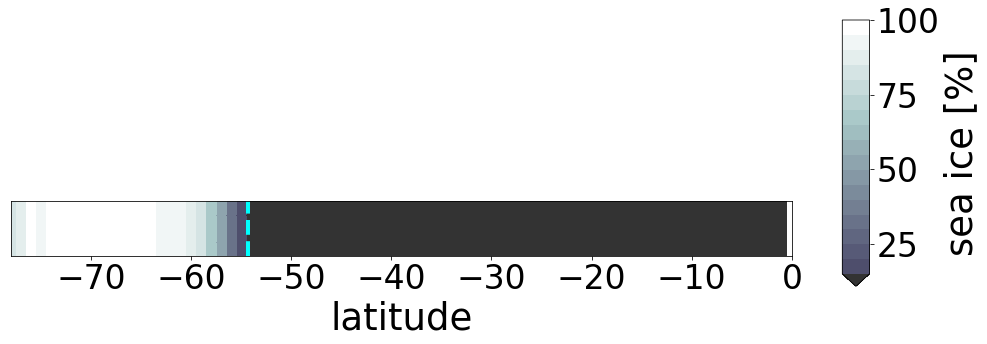

In [13]:
fig, ax = plt.subplots(figsize=(14,1))

lvIce = np.linspace(0.35,1.0,17) #12
cmIce = cm.bone(lvIce)
newCmap = mcol.ListedColormap(cmIce)

newCmap.set_under('0.2')

# set sizes
numfontsize=33
texfontsize=37

which='LR'
period='sta'

yySIE=dataSIE[which]['yy'];
xxSIE=dataSIE[which]['xx'];

#plt.gca().invert_xaxis()

lats=yySIE[:,0];
lats[lats>0.]=np.nan; # just keep Southern Ocean
lons=xxSIE[0,:];

X=-yy[:,149]; Z=100.*dataSIE[which]['area_'+period][:,149]

Y=np.arange(0,5)
Yrep=np.matlib.repmat(Y, 180, 1).T

im=plt.pcolor(np.array([X,X,X,X,X]),Yrep, np.array([Z,Z,Z,Z,Z]), cmap=newCmap, vmin=15., vmax=100.)

plt.vlines(dataSIE[which]['extents_'+period][lons==-30.5], 0., 4., color='cyan', linewidths=4, linestyle='dashed')
plt.axis([-78., 0., 0., 4.]);

# tick sizes
plt.xticks(fontsize=numfontsize, rotation=0);
plt.yticks(fontsize=numfontsize, rotation=0);

plt.xlabel('latitude',fontsize=texfontsize);
ax.axes.yaxis.set_visible(False)

# annotation
# plt.annotate(which, xy=(0.04, 0.22), xycoords='axes fraction', backgroundcolor = 'none', color='k', fontsize=50)

# Now adding the colorbar
cbaxes = fig.add_axes([.95, -.3, 0.027, 3.7]) 
cbar = plt.colorbar(im, orientation = 'vertical', cax = cbaxes, extend='min')  

cbar_label='sea ice [%]'
cbar.set_label(cbar_label, fontsize=texfontsize)
cbar.ax.tick_params(labelsize=numfontsize) 


saveFIG=True
if saveFIG==True:
   pp = PdfPages('./Figure4c_ice.pdf')
   pp.savefig(fig,bbox_inches = 'tight')
   pp.close()

### HR potential temperature, panel e)

In [14]:
meshname4plots ='HR'

In [15]:
# get 3D T & S fields 
data_T=data['HR']['zz_temp_pot']
data_S=data['HR']['zz_salt']
xx=data['HR']['xx']
yy=data['HR']['yy']

# initalize T & S sections (lev x lats)
sect_layer=np.zeros((33,180)) 
sect_layer_S=np.zeros((33,180))

# initialize sigma layers in model and PHC, section
sigm_layer=np.zeros((33,180)) 
sigm_layer_PHC=np.zeros((33,180))

# go through T & S for every layer (0 ... 32):
for ilevel in np.arange(np.shape(data['PHC']['clim'].z)[0]):
    # 2D T & S on level
    layer=data_T[ilevel,:,:]
    layer_S=data_S[ilevel,:,:]
    # 2D sigma2 on level
    layersigma=data['HR']['zz_sigma_2'][ilevel,:,:]
    layersigma_PHC=data['PHC']['PHC_sigma2'][ilevel,:,:]
    
    # cut out T & S section
    sect_layer[ilevel,:]=layer[xx==-30.5]
    sect_layer_S[ilevel,:]=layer_S[xx==-30.5]
    # sigma layers, section
    sigm_layer[ilevel,:]=layersigma[xx==-30.5]
    sigm_layer_PHC[ilevel,:]=layersigma_PHC[xx==-30.5] 

#### HR potential temperature, panel e)

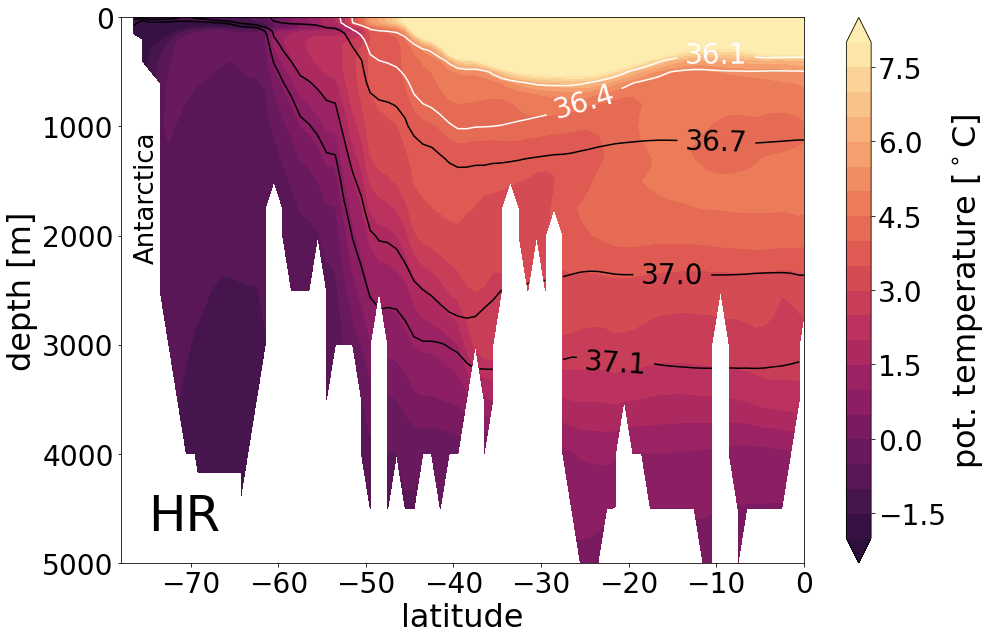

In [16]:
fig=plt.figure(figsize=(14,9))

cmap=cmocean.cm.matter_r

# set sizes
numfontsize=28
texfontsize=32

uptolat=91

YY,CLIMZ=np.meshgrid(yy[:uptolat,0], data['PHC']['clim'].z[0:])
levels = np.arange(-2, 8.+0.5, 0.5) # -5 to 5 degrees
CS1 = plt.contourf(YY, CLIMZ, sect_layer[0:,:uptolat], levels = levels, cmap=cmap, extend='both'); 

plt.gca().invert_yaxis()

# highlight some contours
CS3 = plt.contour(YY, CLIMZ, sigm_layer[:,:uptolat], levels=np.round(np.array([36.1, 36.4, 36.7, 37.0, 37.1]),1),colors=['w','w','k','k','k']) # 
manual_locations = [(-10, 300), (-25, 800), (-10, 1500), (-15, 2500), (-20, 4000)]
plt.clabel(CS3, inline=1, fontsize=numfontsize, fmt='%1.1f', manual=manual_locations)

plt.text(-76.5,2200,'Antarctica', rotation='90', fontsize=26)
plt.ylabel('depth [m]',fontsize=texfontsize), plt.xlabel('latitude',fontsize=texfontsize)
plt.ylim((5000,0))
plt.xlim((-78,0))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# colorbar
cbar=plt.colorbar(CS1, orientation = 'vertical')
cbar_label='pot. temperature [$^\circ$C]'
cbar.set_label(cbar_label, fontsize=texfontsize)
cbar.ax.tick_params(labelsize=numfontsize) 

# tick sizes
plt.xticks(fontsize=numfontsize, rotation=0)
plt.yticks(fontsize=numfontsize, rotation=0)

# annotation
plt.annotate('HR', xy=(0.04, 0.059), xycoords='axes fraction', backgroundcolor = 'w', color='k', fontsize=50)

plt.tight_layout()

saveFIG=True
if saveFIG==True:
   pp = PdfPages('./Figure4e_HR.pdf')
   pp.savefig(fig,bbox_inches = 'tight')
   pp.close()

#### HR salinity, panel b)

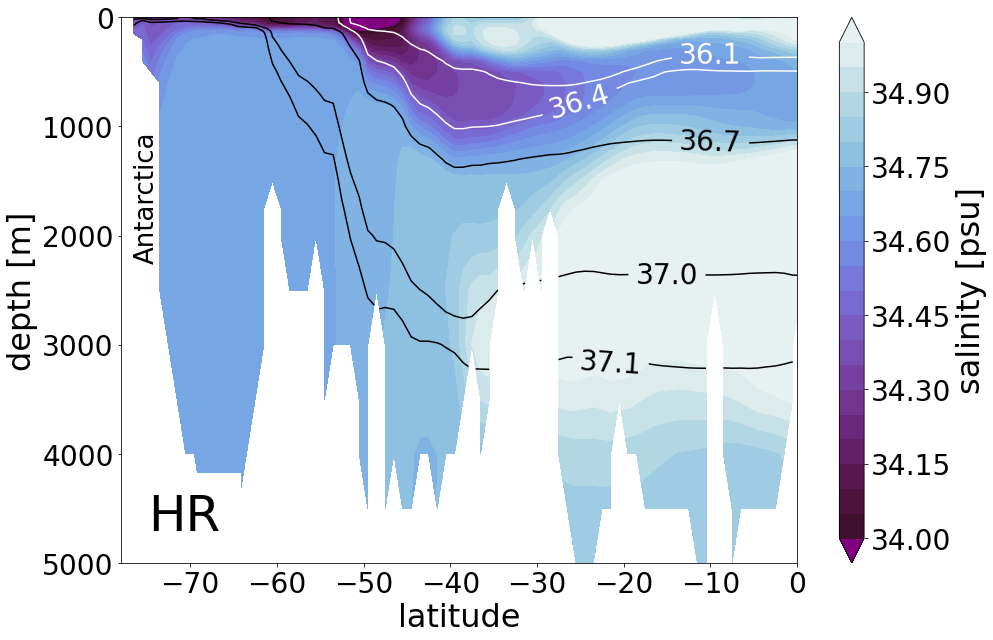

In [17]:
fig=plt.figure(figsize=(14,9))

cmap=cmocean.cm.dense_r
cmap.set_under('purple')

# set sizes
numfontsize=28
texfontsize=32

uptolat=91

levels = np.arange(34, 35.+0.05, 0.05) # -1 to 1 psu
YY,CLIMZ=np.meshgrid(yy[:uptolat,0], data['PHC']['clim'].z[0:])
CS1 = plt.contourf(YY, CLIMZ, sect_layer_S[0:,:uptolat], levels = levels, cmap=cmap, extend='both');

plt.gca().invert_yaxis()

# highlight some contours
CS3 = plt.contour(YY, CLIMZ, sigm_layer[:,:uptolat], levels=np.round(np.array([36.1, 36.4, 36.7, 37.0, 37.1]),1),colors=['w','w','k','k','k']) # 
manual_locations = [(-10, 300), (-25, 800), (-10, 1500), (-15, 2500), (-20, 4000)]
plt.clabel(CS3, inline=1, fontsize=numfontsize, fmt='%1.1f', manual=manual_locations)

plt.text(-76.5,2200,'Antarctica', rotation='90', fontsize=26)
plt.ylabel('depth [m]',fontsize=texfontsize), plt.xlabel('latitude',fontsize=texfontsize)
plt.ylim((5000,0))
plt.xlim((-78,0))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# colorbar
cbar=plt.colorbar(CS1, orientation = 'vertical')
cbar_label='salinity [psu]'
cbar.set_label(cbar_label, fontsize=texfontsize)
cbar.ax.tick_params(labelsize=numfontsize) 

# tick sizes
plt.xticks(fontsize=numfontsize, rotation=0)
plt.yticks(fontsize=numfontsize, rotation=0)

# annotation
plt.annotate('HR', xy=(0.04, 0.059), xycoords='axes fraction', backgroundcolor = 'w', color='k', fontsize=50)

plt.tight_layout()

saveFIG=True
if saveFIG==True:
   pp = PdfPages('./Figure4b_HR.pdf')
   pp.savefig(fig,bbox_inches = 'tight')
   pp.close()

#### HR sea-ice fraction, panel b)

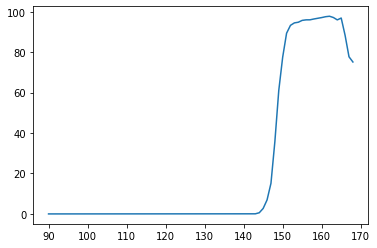

In [18]:
which='HR'
period='sta'
plt.plot(100.*dataSIE[which]['area_'+period][:,149])

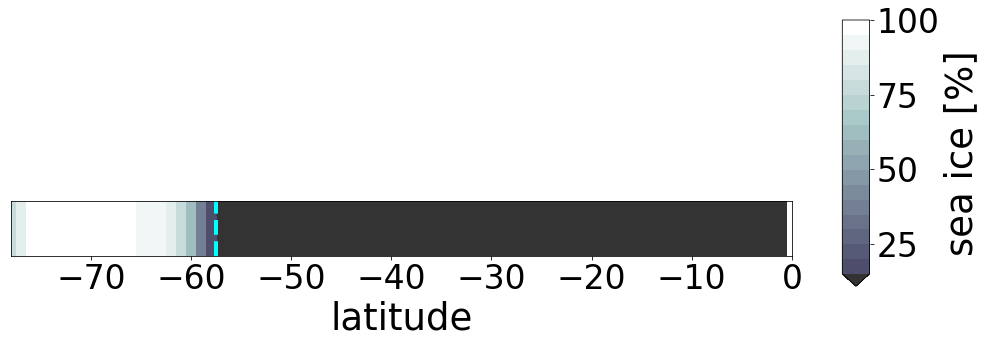

In [20]:
fig, ax = plt.subplots(figsize=(14,1))

lvIce = np.linspace(0.35,1.0,17) #12
cmIce = cm.bone(lvIce)
newCmap = mcol.ListedColormap(cmIce)

newCmap.set_under('0.2')

# set sizes
numfontsize=33
texfontsize=37

which='HR'
period='sta'

yySIE=dataSIE[which]['yy'];
xxSIE=dataSIE[which]['xx'];

#plt.gca().invert_xaxis()

lats=yySIE[:,0];
lats[lats>0.]=np.nan; # just keep Southern Ocean
lons=xxSIE[0,:];

X=-yy[:,149]; Z=100.*dataSIE[which]['area_'+period][:,149]

Y=np.arange(0,5)
Yrep=np.matlib.repmat(Y, 180, 1).T

im=plt.pcolor(np.array([X,X,X,X,X]),Yrep, np.array([Z,Z,Z,Z,Z]), cmap=newCmap, vmin=15., vmax=100.) # shading='nearest'

plt.vlines(dataSIE[which]['extents_'+period][lons==-30.5], 0., 4., color='cyan', linewidths=4, linestyle='dashed')
plt.axis([-78., 0., 0., 4.]);

# tick sizes
plt.xticks(fontsize=numfontsize, rotation=0);
plt.yticks(fontsize=numfontsize, rotation=0);

plt.xlabel('latitude',fontsize=texfontsize);
ax.axes.yaxis.set_visible(False)

# annotation
# plt.annotate(which, xy=(0.04, 0.22), xycoords='axes fraction', backgroundcolor = 'none', color='k', fontsize=50)

# Now adding the colorbar
cbaxes = fig.add_axes([.95, -.3, 0.027, 3.7]) 
cbar = plt.colorbar(im, orientation = 'vertical', cax = cbaxes, extend='min')  

cbar_label='sea ice [%]'
cbar.set_label(cbar_label, fontsize=texfontsize)
cbar.ax.tick_params(labelsize=numfontsize) 


saveFIG=True
if saveFIG==True:
   pp = PdfPages('./Figure4b_ice.pdf')
   pp.savefig(fig,bbox_inches = 'tight')
   pp.close()

### PHC

In [21]:
# get 3D T & S fields 
data_T=data['PHC']['clim'].T
data_S=data['PHC']['clim'].S

# initalize T & S sections (lev x lats)
sect_layer=np.zeros((33,180)) 
sect_layer_S=np.zeros((33,180))

# initialize sigma layers in model and PHC, section
sigm_layer=np.zeros((33,180)) 
sigm_layer_PHC=np.zeros((33,180))

# go through T & S for every layer (0 ... 32):
for ilevel in np.arange(np.shape(data['PHC']['clim'].z)[0]):
    # 2D T & S on level
    layer=data_T[ilevel,:,:]
    layer_S=data_S[ilevel,:,:]
    # 2D sigma2 on level
    layersigma=data['PHC']['PHC_sigma2'][ilevel,:,:]
    layersigma_PHC=data['PHC']['PHC_sigma2'][ilevel,:,:]
    
    # cut out T & S section
    sect_layer[ilevel,:]=layer[xx==-30.5]
    sect_layer_S[ilevel,:]=layer_S[xx==-30.5]
    # sigma layers, section
    sigm_layer[ilevel,:]=layersigma[xx==-30.5]
    sigm_layer_PHC[ilevel,:]=layersigma_PHC[xx==-30.5] 

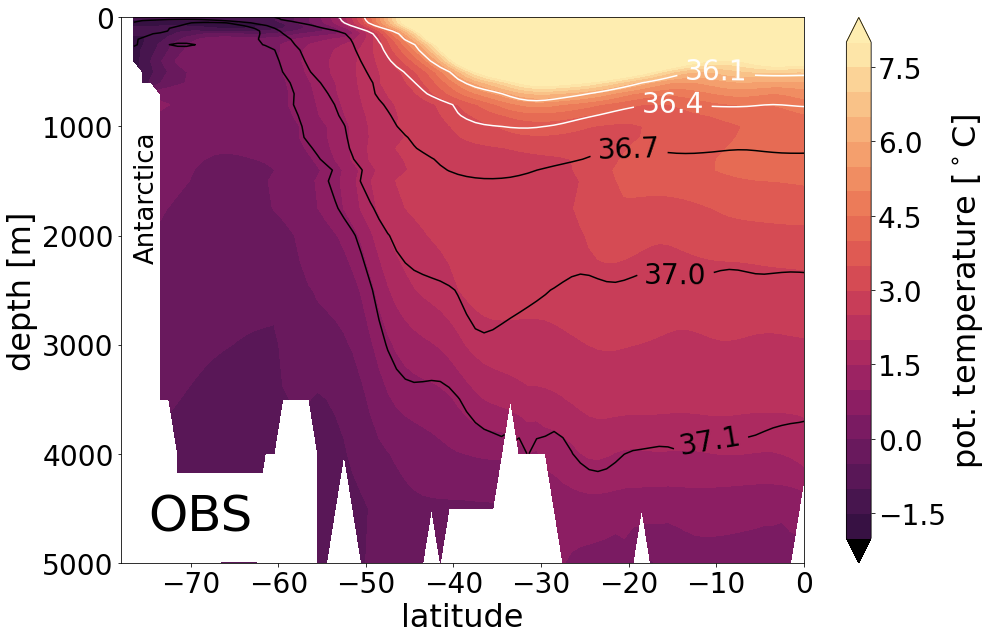

In [22]:
fig=plt.figure(figsize=(14,9))

cmap=cmocean.cm.matter_r
cmap.set_under('black')

# set sizes
numfontsize=28
texfontsize=32

uptolat=91

levels = np.arange(-2, 8.+0.5, 0.5) # -5 to 5 degrees
YY,CLIMZ=np.meshgrid(yy[:uptolat,0], data['PHC']['clim'].z[0:])
CS1 = plt.contourf(YY, CLIMZ, sect_layer[0:,:uptolat], levels = levels, cmap=cmap, extend='both');
plt.gca().invert_yaxis()

# highlight some contours
CS3 = plt.contour(YY, CLIMZ, sigm_layer_PHC[:,:uptolat], levels=np.round(np.array([36.1, 36.4, 36.7, 37.0, 37.1]),1),colors=['w','w','k','k','k']) # 
manual_locations = [(-10, 500), (-15, 1000), (-20, 1500), (-15, 2500), (-10, 4000)]
plt.clabel(CS3, inline=1, fontsize=numfontsize, fmt='%1.1f', manual=manual_locations)

plt.text(-76.5,2200,'Antarctica', rotation='90', fontsize=26)
plt.ylabel('depth [m]',fontsize=texfontsize), plt.xlabel('latitude',fontsize=texfontsize)
plt.ylim((5000,0))
plt.xlim((-78,0))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# colorbar
cbar=plt.colorbar(CS1, orientation = 'vertical')
cbar_label='pot. temperature [$^\circ$C]'
cbar.set_label(cbar_label, fontsize=texfontsize)
cbar.ax.tick_params(labelsize=numfontsize) 

# tick sizes
plt.xticks(fontsize=numfontsize, rotation=0)
plt.yticks(fontsize=numfontsize, rotation=0)

# annotation
plt.annotate('OBS', xy=(0.04, 0.059), xycoords='axes fraction', backgroundcolor = 'w', color='k', fontsize=50)

plt.tight_layout()

saveFIG=True
if saveFIG==True:
   pp = PdfPages('./Figure4d.pdf')
   pp.savefig(fig,bbox_inches = 'tight')
   pp.close()

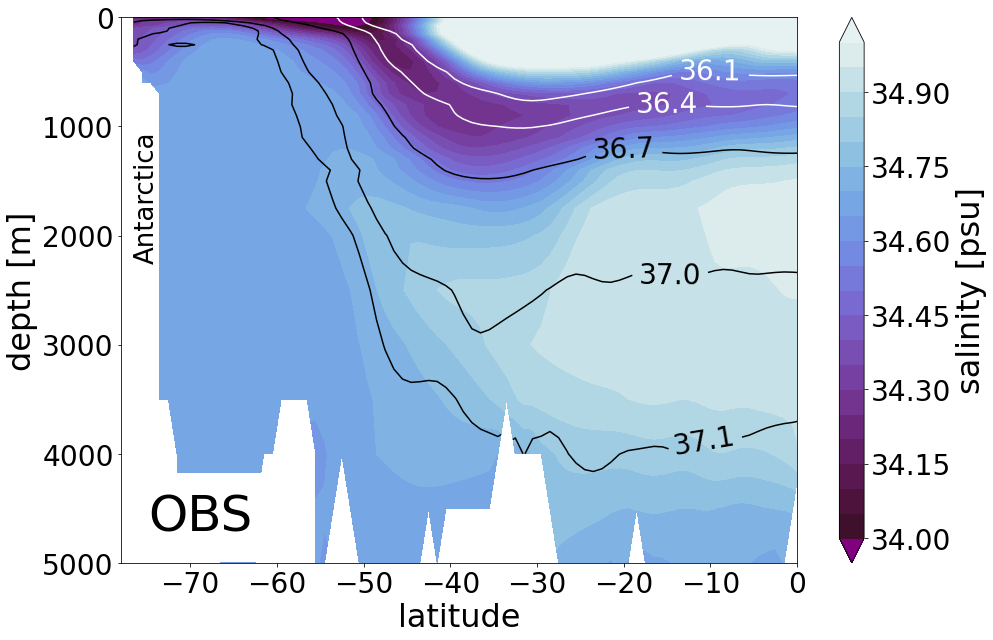

In [23]:
fig=plt.figure(figsize=(14,9))

cmap=cmocean.cm.dense_r
cmap.set_under('purple')

# set sizes
numfontsize=28
texfontsize=32

uptolat=91

levels = np.arange(34, 35.+0.05, 0.05) # -1 to 1 psu
YY,CLIMZ=np.meshgrid(yy[:uptolat,0], data['PHC']['clim'].z[0:])
CS1 = plt.contourf(YY, CLIMZ, sect_layer_S[:,:uptolat], levels = levels, cmap=cmap, extend='both');

plt.gca().invert_yaxis()

# highlight some contours
CS3 = plt.contour(YY, CLIMZ, sigm_layer_PHC[:,:uptolat], levels=np.round(np.array([36.1, 36.4, 36.7, 37.0, 37.1]),1),colors=['w','w','k','k','k']) # 
manual_locations = [(-10, 500), (-15, 1000), (-20, 1500), (-15, 2500), (-10, 4000)]
plt.clabel(CS3, inline=1, fontsize=numfontsize, fmt='%1.1f', manual=manual_locations)

plt.text(-76.5,2200,'Antarctica', rotation='90', fontsize=26)
plt.ylabel('depth [m]',fontsize=texfontsize), plt.xlabel('latitude',fontsize=texfontsize)
plt.ylim((5000,0))
plt.xlim((-78,0))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# colorbar
cbar=plt.colorbar(CS1, orientation = 'vertical')
cbar_label='salinity [psu]'
cbar.set_label(cbar_label, fontsize=texfontsize)
cbar.ax.tick_params(labelsize=numfontsize) 

# tick sizes
plt.xticks(fontsize=numfontsize, rotation=0)
plt.yticks(fontsize=numfontsize, rotation=0)

# annotation
plt.annotate('OBS', xy=(0.04, 0.059), xycoords='axes fraction', backgroundcolor = 'w', color='k', fontsize=50)

plt.tight_layout()

saveFIG=True
if saveFIG==True:
   pp = PdfPages('./Figure4a.pdf')
   pp.savefig(fig,bbox_inches = 'tight')
   pp.close()